In [1]:
# Importing Important Libraries 
import pandas as pd 
import numpy as np 

In [2]:
# 1. Importing Datset using Pandas
ds = pd.read_csv(r'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')
ds.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:

# 2. High Level Data Understanding 
    # a. Find No. of Rows and columns in Dataset
print('Rows =', ds.shape[0] , "|| Columns = ", ds.shape[1])

Rows = 57394 || Columns =  49


In [4]:
    # b. Datatypes of the columns
ds.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
    # c. Info & describe of data in dataframe
print(ds.info())
print("\n\n\t Discribing Data \n", ds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
# 3. Low level Data Understanding
    # a. Find count of unique values in location column.
ds['location'].nunique()

216

In [8]:
    # b. Find which continent has maximum frequency using values
ds['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [9]:
    # c. Find maximum and mean value in 'Total_cases'
print("Maximum total cases : ", ds['total_cases'].max())
print('Total Cases Mean Value: ', ds['total_cases'].mean() )

Maximum total cases :  55154651.0
Total Cases Mean Value:  167797.3688753302


In [14]:
    # d. Find 25%,50% & 75% quartile value in 'total_deaths'.
print('25% : ' ,ds['total_deaths'].quantile(0.25),
      '\n50% : ' ,ds['total_deaths'].quantile(0.5), 
      '\n75% : ' ,ds['total_deaths'].quantile(0.75))

25% :  13.0 
50% :  84.0 
75% :  727.0


In [15]:
    # e. Find which continent has maximum 'human_development_index'.
res = ds.groupby('continent').human_development_index.max()
res.sort_values(ascending = False)

continent
Europe           0.953
Oceania          0.939
Asia             0.933
North America    0.926
South America    0.843
Africa           0.797
Name: human_development_index, dtype: float64

In [16]:
    # f. Find which continent has minimum 'gdp_per_capita'.
res = ds.groupby('continent').gdp_per_capita.min()
res.sort_values(ascending = True)

continent
Africa            661.240
Asia             1479.147
North America    1653.173
Oceania          2205.923
Europe           5189.972
South America    6885.829
Name: gdp_per_capita, dtype: float64

In [36]:
 # 4. Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'] and update the data frame.
ds = ds[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
ds.update(ds)
ds.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498


In [37]:
# 5. Data Cleaning 
    # a. Remove all duplicates observations
ds.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,2020-11-13,696.0,7.0,NaN,NaN
57390,NaN,International,2020-11-14,696.0,7.0,NaN,NaN
57391,NaN,International,2020-11-15,696.0,7.0,NaN,NaN
57392,NaN,International,2020-11-16,696.0,7.0,NaN,NaN


In [38]:
    #b. Find missing values in all columns
ds.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [39]:
    # c. Remove all observations where continent column value is missing
ds['continent'].dropna()

0          Asia
1          Asia
2          Asia
3          Asia
4          Asia
          ...  
56743    Africa
56744    Africa
56745    Africa
56746    Africa
56747    Africa
Name: continent, Length: 56748, dtype: object

In [40]:
    # d. Fill all missing values with 0
ds.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,2020-11-13,696.0,7.0,0.000,0.000
57390,0,International,2020-11-14,696.0,7.0,0.000,0.000
57391,0,International,2020-11-15,696.0,7.0,0.000,0.000
57392,0,International,2020-11-16,696.0,7.0,0.000,0.000


In [41]:
# 6. Date time format : 
    # a. Convert date column in datetime format using pandas.to_datetime
ds['date'] = pd.to_datetime(ds['date'])

ds.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498


In [44]:
    # b. Create new column month after extracting month data from date column.
ds['month'] = pd.DatetimeIndex(ds['date']).month
fifth_column = ds.pop('month')
ds.insert(3,'month',fifth_column)
ds.head()

,continent,location,date,month,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,12,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,1,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,2,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,3,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,4,NaN,NaN,1803.987,0.498


In [45]:
# 7. Data Aggregation: 
    # a. Find max value in all columns using groupby function on 'continent' column
ds2 = ds.groupby('continent').max()
ds2

,location,date,month,total_cases,total_deaths,gdp_per_capita,human_development_index
continent,,,,,,,
Africa,Zimbabwe,2020-12-11,12,752269.0,20314.0,26382.287,0.797
Asia,Yemen,2020-12-11,12,8874290.0,130519.0,116935.600,0.933
Europe,Vatican,2020-12-11,12,1991233.0,52147.0,94277.965,0.953
North America,United States Virgin Islands,2020-12-11,12,11205486.0,247220.0,54225.446,0.926
Oceania,Wallis and Futuna,2020-12-11,12,27750.0,907.0,44648.710,0.939
South America,Venezuela,2020-12-11,12,5876464.0,166014.0,22767.037,0.843


In [46]:
    # b. Store the result in a new dataframe named 'df_groupby'. (Use df_groupby dataframe for all further analysis)
df_groupby = pd.DataFrame(ds2)
df_groupby

,location,date,month,total_cases,total_deaths,gdp_per_capita,human_development_index
continent,,,,,,,
Africa,Zimbabwe,2020-12-11,12,752269.0,20314.0,26382.287,0.797
Asia,Yemen,2020-12-11,12,8874290.0,130519.0,116935.600,0.933
Europe,Vatican,2020-12-11,12,1991233.0,52147.0,94277.965,0.953
North America,United States Virgin Islands,2020-12-11,12,11205486.0,247220.0,54225.446,0.926
Oceania,Wallis and Futuna,2020-12-11,12,27750.0,907.0,44648.710,0.939
South America,Venezuela,2020-12-11,12,5876464.0,166014.0,22767.037,0.843


In [47]:
#8. Feature Engineering : 
    # a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_deaths'
ds['total_deaths_to_total_cases'] = ds['total_deaths'] / ds['total_deaths']
print(ds)

      continent       location       date  month  total_cases  total_deaths  \
0          Asia    Afghanistan 2019-12-31     12          NaN           NaN   
1          Asia    Afghanistan 2020-01-01      1          NaN           NaN   
2          Asia    Afghanistan 2020-02-01      2          NaN           NaN   
3          Asia    Afghanistan 2020-03-01      3          NaN           NaN   
4          Asia    Afghanistan 2020-04-01      4          NaN           NaN   
...         ...            ...        ...    ...          ...           ...   
57389       NaN  International 2020-11-13     11        696.0           7.0   
57390       NaN  International 2020-11-14     11        696.0           7.0   
57391       NaN  International 2020-11-15     11        696.0           7.0   
57392       NaN  International 2020-11-16     11        696.0           7.0   
57393       NaN  International 2020-11-17     11        696.0           7.0   

       gdp_per_capita  human_development_index  tot

<AxesSubplot:xlabel='gdp_per_capita', ylabel='Count'>

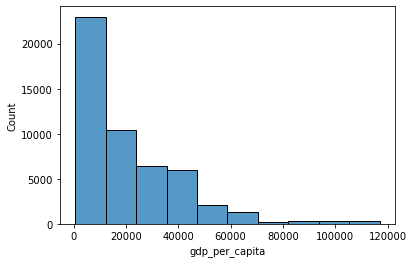

In [48]:
#9. Data Visualization : 
    #a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
import seaborn as sns
sns.histplot(ds['gdp_per_capita'], bins = 10)

<AxesSubplot:xlabel='total_cases', ylabel='gdp_per_capita'>

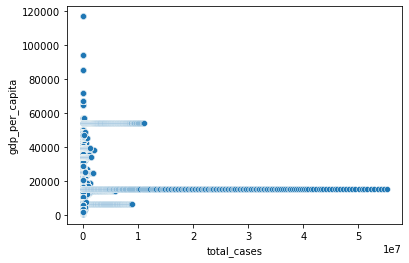

In [49]:
    # b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(data = ds, x="total_cases", y="gdp_per_capita")

<AxesSubplot:xlabel='continent', ylabel='total_cases'>

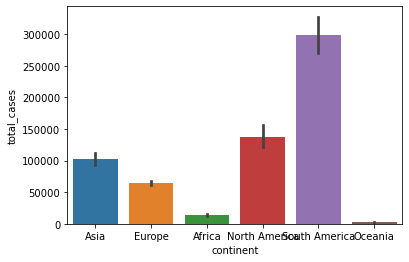

In [50]:
# d. Plot a bar plot of 'continent' column with 'total_cases' .
sns.barplot(x = 'continent',y = 'total_cases',data = ds)

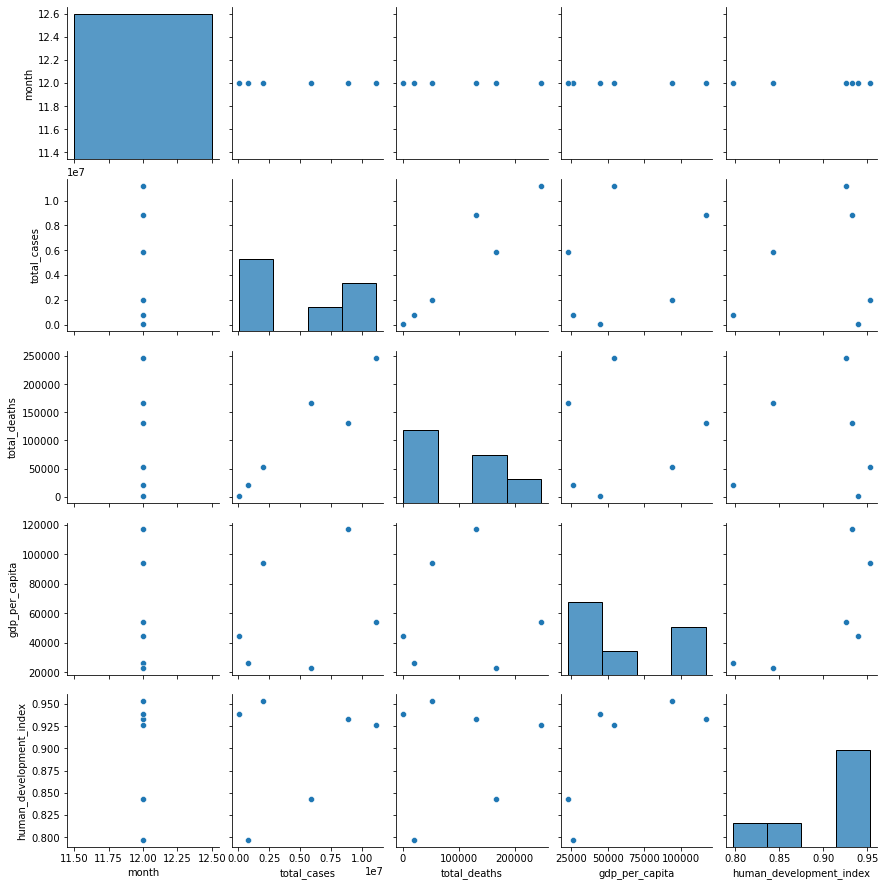

In [51]:
    # c. Plot Pairplot on df_groupby dataset.
sns.pairplot(data = df_groupby)

In [64]:
df_groupby.to_csv('Final Project.csv')

In [66]:
df = pd.read_csv(r'C:\Users\ragha\Desktop\Final Project.csv')
df.head()

,continent,location,date,month,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Africa,Zimbabwe,2020-12-11,12,752269.0,20314.0,26382.287,0.797
1,Asia,Yemen,2020-12-11,12,8874290.0,130519.0,116935.600,0.933
2,Europe,Vatican,2020-12-11,12,1991233.0,52147.0,94277.965,0.953
3,North America,United States Virgin Islands,2020-12-11,12,11205486.0,247220.0,54225.446,0.926
4,Oceania,Wallis and Futuna,2020-12-11,12,27750.0,907.0,44648.710,0.939
